In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
data=pd.read_csv('age_height.csv')

In [4]:
data.head()

,Age(year),Height(ft)
0,0.0,0.5
1,1.0,1.5
2,2.0,2.0
3,3.0,2.5
4,NaN,9.0


In [22]:
data=data.dropna()

In [23]:
data.shape

(13, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
Age(year)     14 non-null float64
Height(ft)    14 non-null float64
dtypes: float64(2)
memory usage: 320.0 bytes


In [8]:
data.describe()

,Age(year),Height(ft)
count,14.000000,14.000000
mean,6.000000,4.235714
std,3.741657,2.197764
min,0.000000,0.500000
25%,3.250000,2.625000
50%,6.000000,4.600000
75%,8.750000,5.475000
max,12.000000,9.000000


In [31]:
X=data.iloc[:,0:1].values

In [32]:
X

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.]])

In [29]:
y=data.iloc[:,1:2].values

In [33]:
X.ndim

2

In [34]:
y

array([[0.5],
       [1.5],
       [2. ],
       [2.5],
       [3. ],
       [4. ],
       [4.2],
       [5. ],
       [5.2],
       [5.4],
       [5.5],
       [5.7],
       [5.8]])

In [19]:
X.dropna()

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [35]:
y

array([[0.5],
       [1.5],
       [2. ],
       [2.5],
       [3. ],
       [4. ],
       [4.2],
       [5. ],
       [5.2],
       [5.4],
       [5.5],
       [5.7],
       [5.8]])

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg=LinearRegression()

In [38]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_reg=PolynomialFeatures(degree=4)

In [41]:
X_poly=poly_reg.fit_transform(X)

In [42]:
poly_reg.fit(X_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [43]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

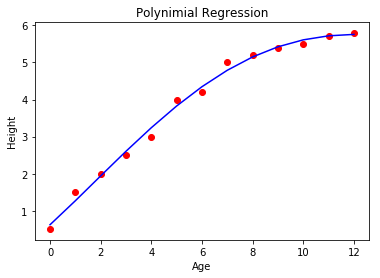

In [45]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Polynimial Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

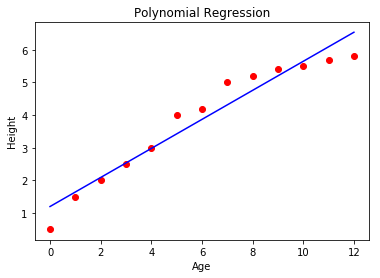

In [47]:
lr=LinearRegression()
yp=lr.fit(X,y).predict(X)
plt.scatter(X,y,color='red')
plt.plot(X,yp,color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

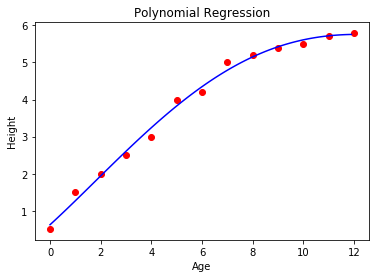

In [48]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [51]:
print(lin_reg.predict([[26.5]])) #LR

[[12.98159341]]


In [53]:
print (lin_reg_2.predict(poly_reg.fit_transform([[26.5]])))#PR

[[16.38277139]]


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred =lin_reg_2.predict(poly_reg.fit_transform(y))
mse = mean_squared_error(y, y_pred)
mse

1.0117478158979218

In [56]:
r_squared = r2_score(y, y_pred)
r_squared

0.6570139996655123